# Imports

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [64]:
# read prepared metrics to analyse
df = pd.read_csv('extractedMetrics.csv', sep=',', header=0)

# Basic Data Exploration

In [65]:
df.head()

,dataset_name,num_instances_train,num_instances_test,train_test_ratio,num_time_points,num_classes,class_distribution_bias,default_rate,num_missing_values,null_rate,num_duplicate_instances,data_repetition_rate,avg_autocorrelation,ks_statistic,ks_p_value
0,PickupGestureWiimoteZ,50,50,1.00,361,10,0.0000,0.0980,21529,0.5847,1,0.0098,0.9592,0.4153,0.0
1,EOGVerticalSignal,362,362,1.00,1250,12,-0.0021,0.0843,0,0.0000,0,0.0000,0.9991,0.1796,0.0
2,TwoPatterns,1000,4000,0.25,128,4,0.0346,0.2612,0,0.0000,0,0.0000,0.8172,0.1027,0.0
3,DiatomSizeReduction,16,306,0.05,345,4,-0.1998,0.3075,0,0.0000,0,0.0000,0.9992,0.0940,0.0
4,MoteStrain,20,1252,0.02,84,2,0.1545,0.5385,0,0.0000,0,0.0000,0.7885,0.0371,0.0


In [66]:
df.describe()

,num_instances_train,num_instances_test,train_test_ratio,num_time_points,num_classes,class_distribution_bias,default_rate,num_missing_values,null_rate,num_duplicate_instances,data_repetition_rate,avg_autocorrelation,ks_statistic,ks_p_value
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,1.280000e+02,128.000000,128.000000,128.000000,128.000000,128.000000,128.0
mean,473.101562,1020.351562,0.832812,534.539062,8.750000,-0.032714,0.337880,1.289359e+04,0.028973,41.703125,0.008805,0.878218,0.184197,0.0
std,1107.386117,2001.818101,0.787609,563.047192,12.020324,0.440849,0.216029,1.022137e+05,0.132304,406.637844,0.039805,0.229979,0.174219,0.0
min,16.000000,20.000000,0.010000,15.000000,2.000000,-2.553500,0.016700,0.000000e+00,0.000000,0.000000,0.000000,-0.200300,0.002700,0.0
25%,53.750000,139.000000,0.210000,144.000000,2.000000,-0.003825,0.125100,0.000000e+00,0.000000,0.000000,0.000000,0.885425,0.074000,0.0
50%,190.500000,316.000000,0.875000,344.000000,4.000000,0.000000,0.333300,0.000000e+00,0.000000,0.000000,0.000000,0.982300,0.137750,0.0
75%,400.000000,870.750000,1.000000,657.750000,10.000000,0.012375,0.513500,0.000000e+00,0.000000,1.000000,0.001000,0.996400,0.243125,0.0
max,8926.000000,16800.000000,4.490000,2844.000000,60.000000,1.821500,0.893600,1.094025e+06,0.756500,4588.000000,0.361100,1.000000,0.997100,0.0


## Correlation Matrix (count shows too many data sets at the moment)

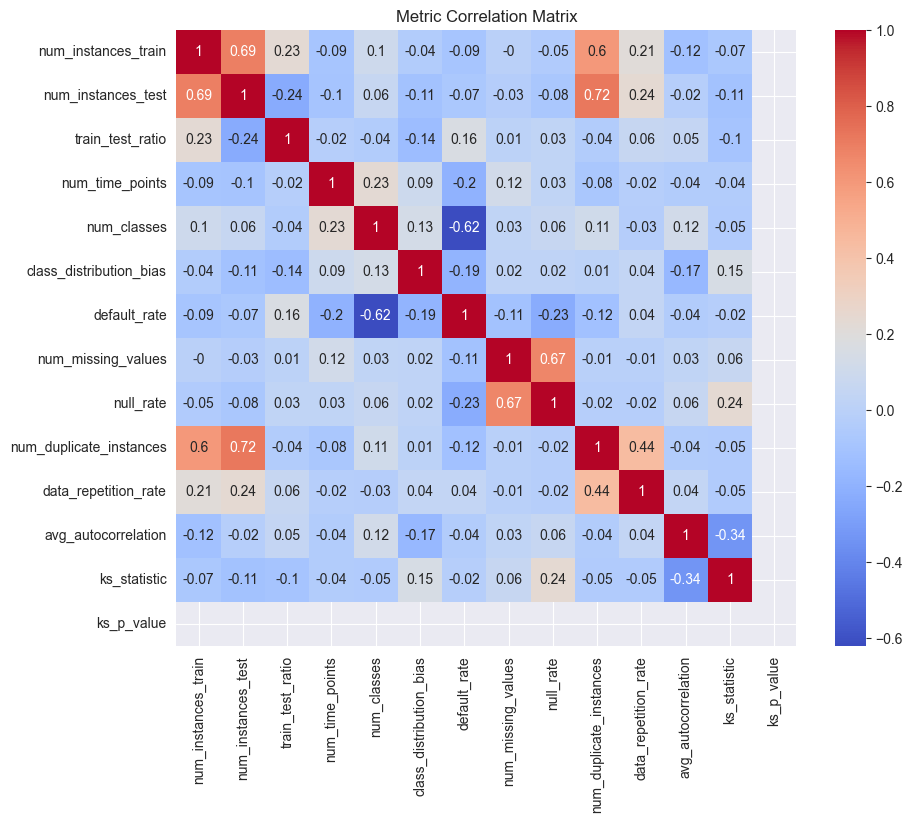

Correlation Matrix Counts:
-1 to -0.5: 2
-0.49 to -0.01: 82
0: 2
0.01 to 0.49: 62
0.5 to 1: 21
Total Sum: 169


In [67]:
# drop dataset name column
df_without_dataset_name = df.drop(columns=['dataset_name'])

# create correlation matrix
correlation_matrix = df_without_dataset_name.corr().round(2)

# change figure size
plt.figure(figsize=(10, 8)) # width, height

# plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Metric Correlation Matrix')
plt.show()

# Count of values for each category
count_neg_1_to_neg_0_5 = ((correlation_matrix >= -1) & (correlation_matrix <= -0.5)).sum().sum()
count_neg_0_49_to_neg_0_01 = ((correlation_matrix >= -0.49) & (correlation_matrix <= -0.01)).sum().sum()
count_0 = ((correlation_matrix > -0.01) & (correlation_matrix < 0.01)).sum().sum()
count_0_01_to_0_49 = ((correlation_matrix >= 0.01) & (correlation_matrix <= 0.49)).sum().sum()
count_0_5_to_1 = ((correlation_matrix >= 0.5) & (correlation_matrix <= 1)).sum().sum()

# Total sum of counts
total_count = count_neg_1_to_neg_0_5 + count_neg_0_49_to_neg_0_01 + count_0 + count_0_01_to_0_49 + count_0_5_to_1

# Print the counts
print("Correlation Matrix Counts:")
print("-1 to -0.5: {}".format(count_neg_1_to_neg_0_5))
print("-0.49 to -0.01: {}".format(count_neg_0_49_to_neg_0_01))
print("0: {}".format(count_0))
print("0.01 to 0.49: {}".format(count_0_01_to_0_49))
print("0.5 to 1: {}".format(count_0_5_to_1))

# Print the total sum
print("Total Sum: {}".format(total_count))

# Define feature columns

In [68]:
feature_columns = ['num_instances_train', 'num_instances_test', 'train_test_ratio', 'num_time_points', 'num_classes', 'default_rate', 'class_distribution_bias', 'num_missing_values', 'null_rate', 'num_duplicate_instances', 'data_repetition_rate', 'avg_autocorrelation', 'ks_statistic', 'ks_p_value']

# Histograms

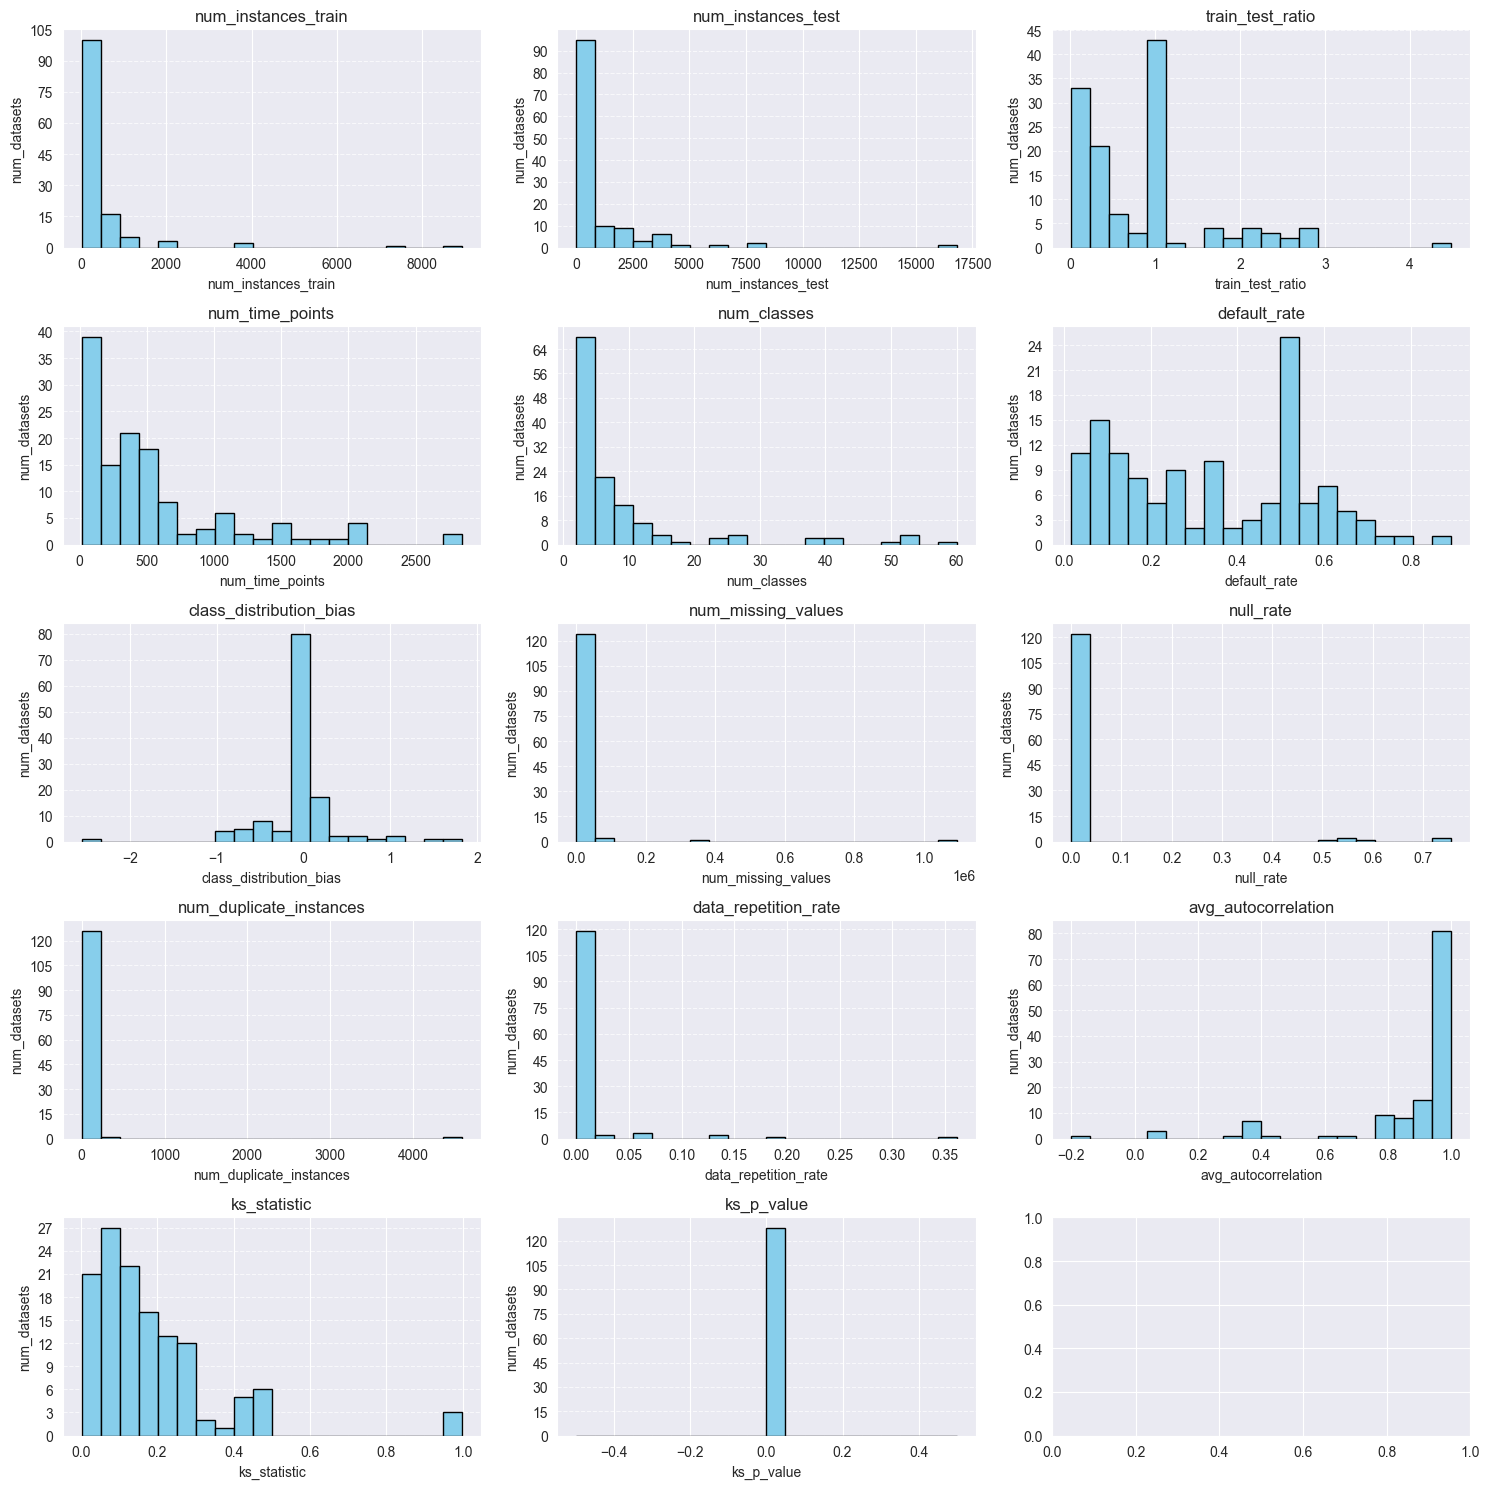

In [69]:
# Set the number of columns for subplots
num_columns = 3
num_rows = (len(feature_columns) + num_columns - 1) // num_columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms for each feature in subplots
for i, feature in enumerate(feature_columns):
    axes[i].hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('num_datasets')
    axes[i].yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Set y-axis ticks to integers
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Box Plots

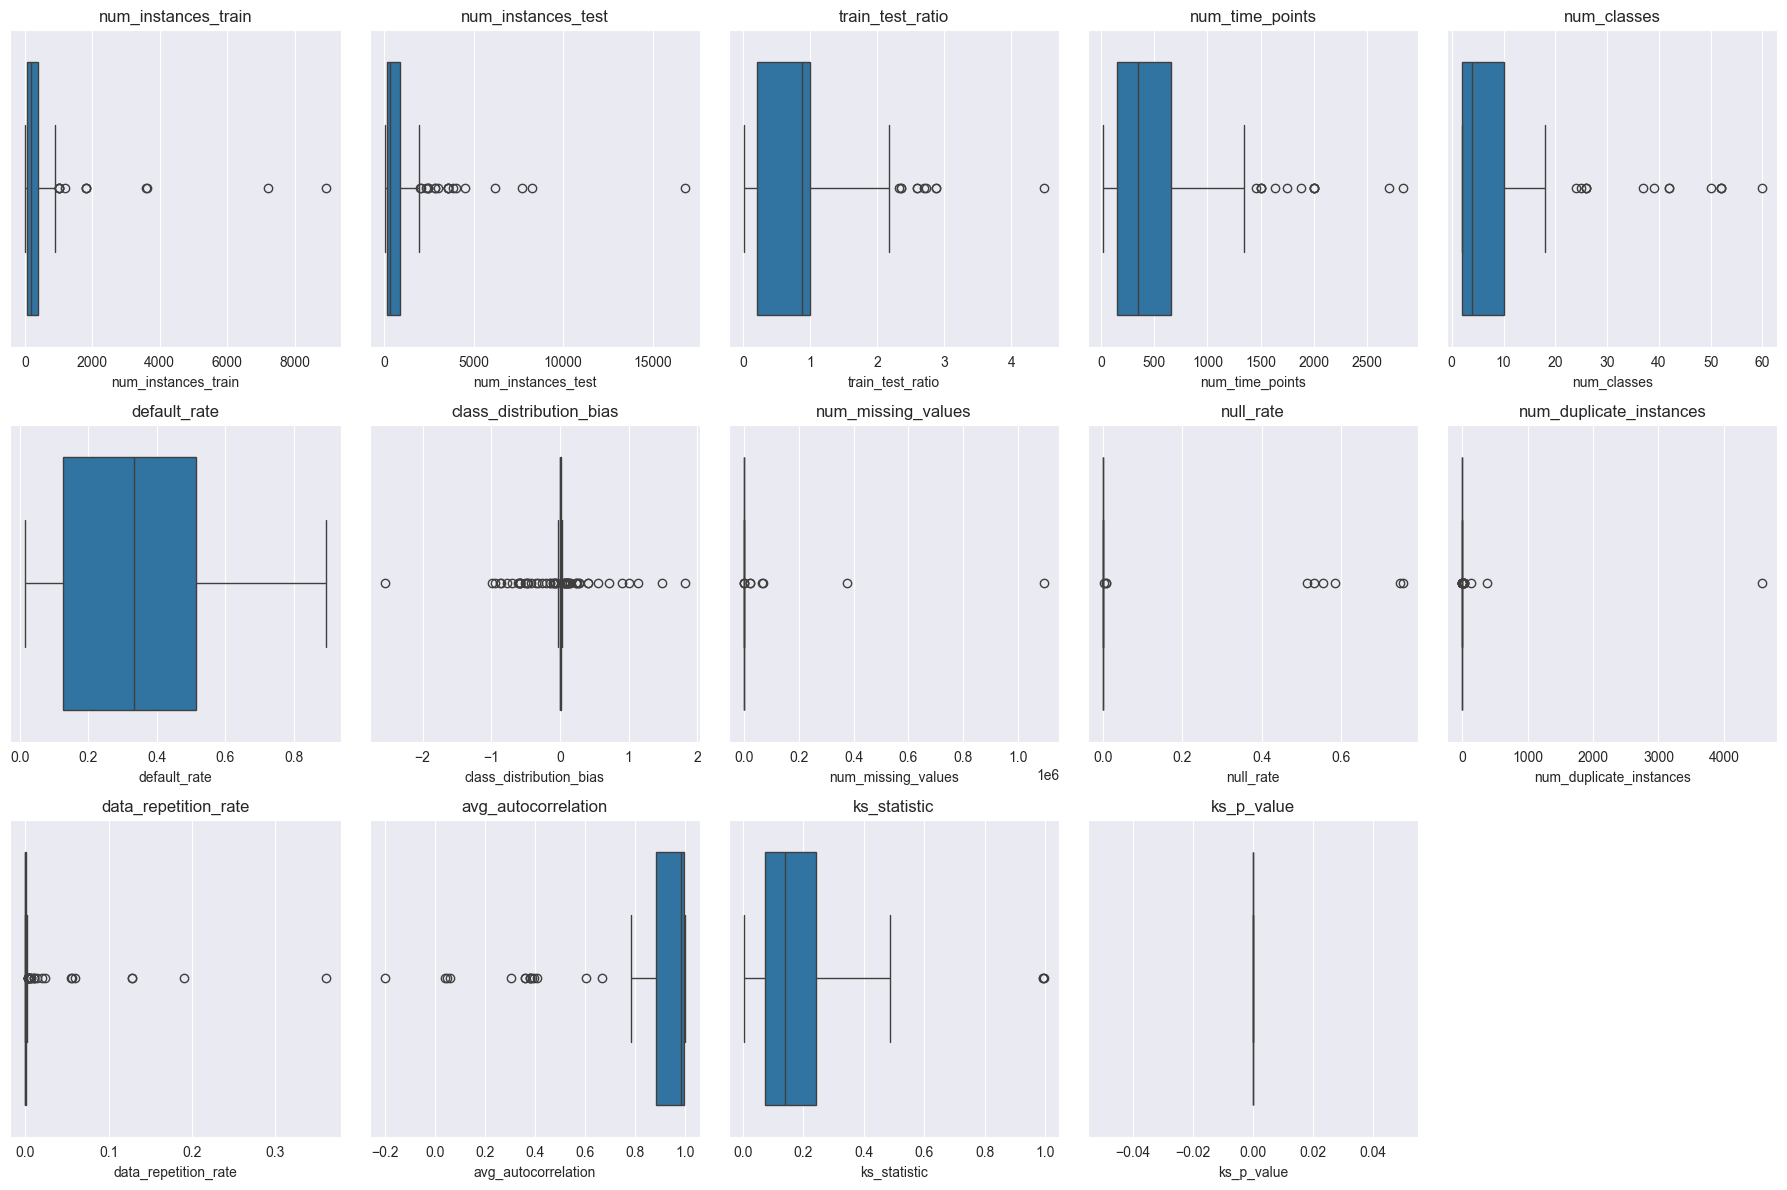

In [70]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(feature_columns, 1):
    plt.subplot(3, 5, i)
    ax = sns.boxplot(x=df[column])

    # Identify outliers using the IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))

    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Scatter Plots

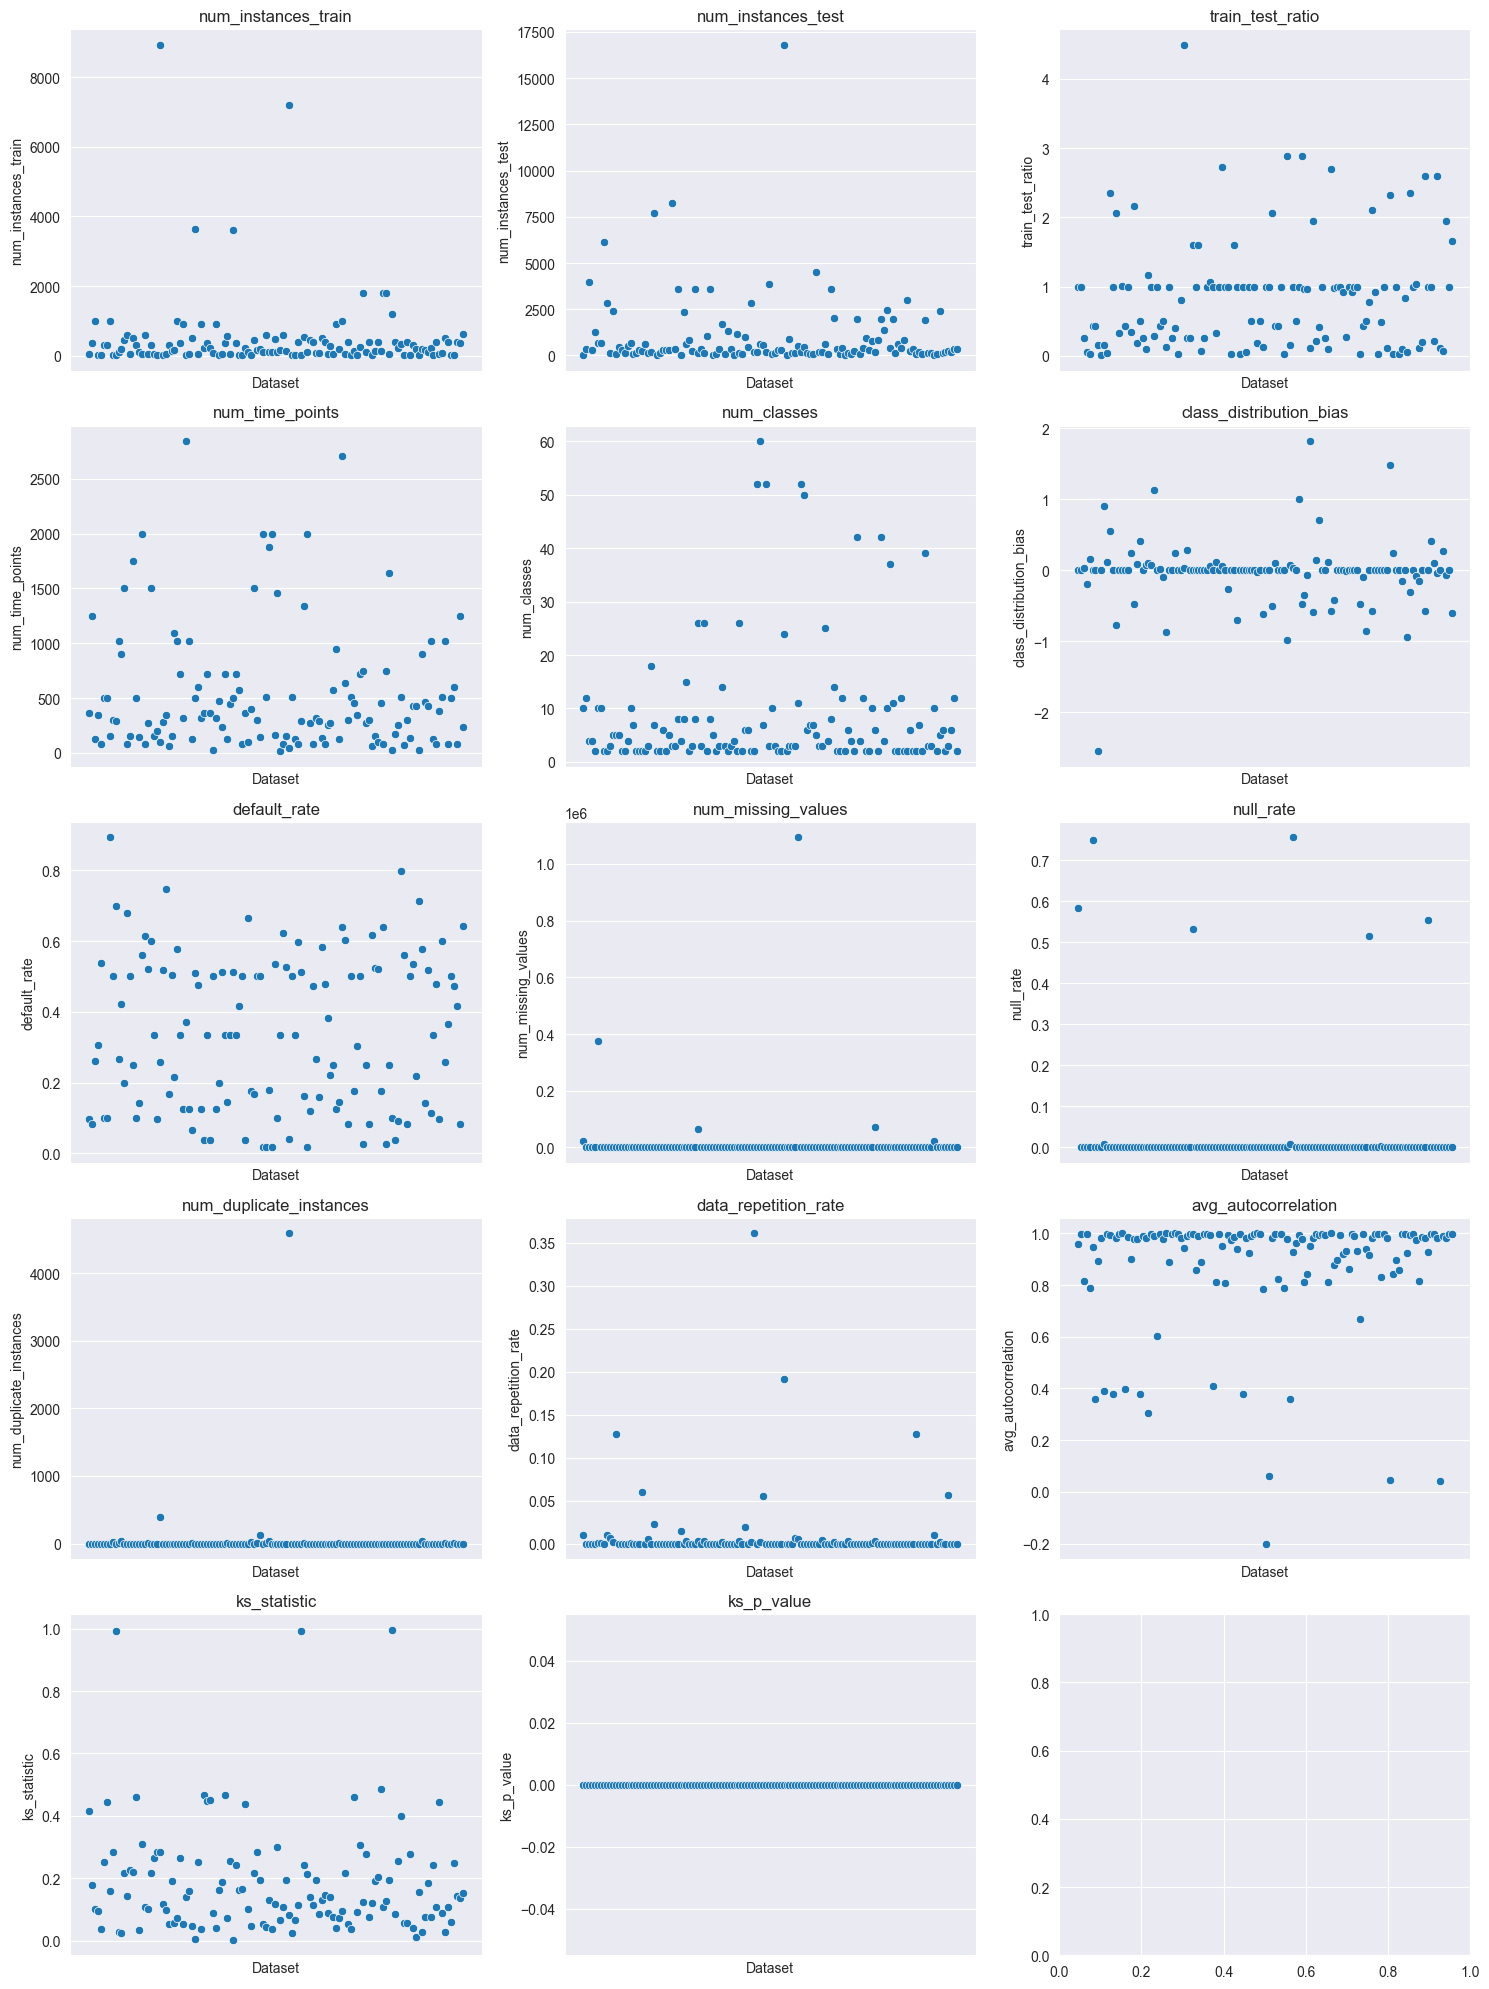

In [71]:
# Number of features (excluding the dataset_name column)
num_features = len(df.columns) - 1

# Calculate the number of rows and columns needed for the subplots
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate through the features and create scatter plots
for i, feature in enumerate(df.columns[1:]):  # Skip the dataset_name column
    ax = axes[i]

    # Create scatter plot
    sns.scatterplot(data=df, x='dataset_name', y=feature, ax=ax)

    # Identify outliers using the IQR method
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)))

    # Remove x-axis labels
    ax.set_xticks([])
    ax.set_xticklabels([])

    # Set x-axis label
    ax.set_xlabel('Dataset')

    ax.set_title(f'{feature}')
    ax.set_ylabel(feature)

# Adjust layout for readability
plt.tight_layout()
plt.show()

# Calculate normal ranges for each feature and print the percentage of outlier datasets

In [73]:
import pandas as pd

total_samples = len(df)
result_data = []

for column in feature_columns:
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # handling values where lower bounds cannot exceed certain limits
    # lower but no uper limit
    if column.startswith("num_") or column.startswith("train_"):
        if lower_bound < 0:
            lower_bound = df[column].min()
    # distances and Kolmogorov-Smirnov
    if column.startswith("null_") or column.startswith("data_") or column.startswith("ks_"):
        if lower_bound < 0:
            lower_bound = 0

    # default error rate
    if column.startswith("default_"):
        if lower_bound <= 0:
            lower_bound = 0.0001
        if upper_bound >= 1:
            upper_bound = 0.9999
        else:
            upper_bound = df[column].max()
            
    # autocorrelation
    if column.startswith("avg_"):
        if upper_bound > 1:
            upper_bound = 1
    
    amount_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    percentage_outliers = (amount_outliers / total_samples) * 100

    lower_bound_str = int(round(lower_bound, 0)) if column.startswith("num_") else round(lower_bound, 4)
    upper_bound_str = int(round(upper_bound, 0)) if column.startswith("num_") else round(upper_bound, 4)

    result_data.append({
        'Feature': column,
        'Normal Range': f'{lower_bound_str} to {upper_bound_str}',
        'Percentage of Outlier Datasets': round(percentage_outliers, 2)
    })

result_df = pd.DataFrame(result_data)
print(result_df)

                    Feature       Normal Range  Percentage of Outlier Datasets
0       num_instances_train          16 to 919                            9.38
1        num_instances_test         20 to 1968                           15.62
2          train_test_ratio      0.01 to 2.185                            7.81
3           num_time_points         15 to 1428                           10.16
4               num_classes            2 to 22                           10.94
5              default_rate   0.0001 to 0.9999                            0.00
6   class_distribution_bias  -0.0281 to 0.0367                           45.31
7        num_missing_values             0 to 0                            7.03
8                 null_rate         0.0 to 0.0                            7.03
9   num_duplicate_instances             0 to 2                           13.28
10     data_repetition_rate        0 to 0.0025                           18.75
11      avg_autocorrelation         0.719 to 1      